In [6]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
# Just to make plots look better
plt.rcParams["figure.figsize"] = (20,12)
plt.rcParams['axes.grid'] = True
plt.style.use('fivethirtyeight')
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['lines.linewidth'] = 3

In [37]:
#gather data
def lines(x):
    if (x > 260492 and x < 16994604) or (x > 17257632  and x < 35336814) or x > 35860191:
        return True
    return False

PATH = "C:/Users/Asus/Desktop/data/"
print("Starting...")
trips = pd.read_csv(PATH + "trip.csv")
status = pd.read_csv(PATH + "status.csv", skiprows= lambda x: lines(x))
# size of status 71.984.435
stations = pd.read_csv(PATH + "station.csv")
print("Done!")

Starting...
Done!


<h1>Trips analysis</h1>

[Text(0.5, 1.0, 'Trips between stations')]

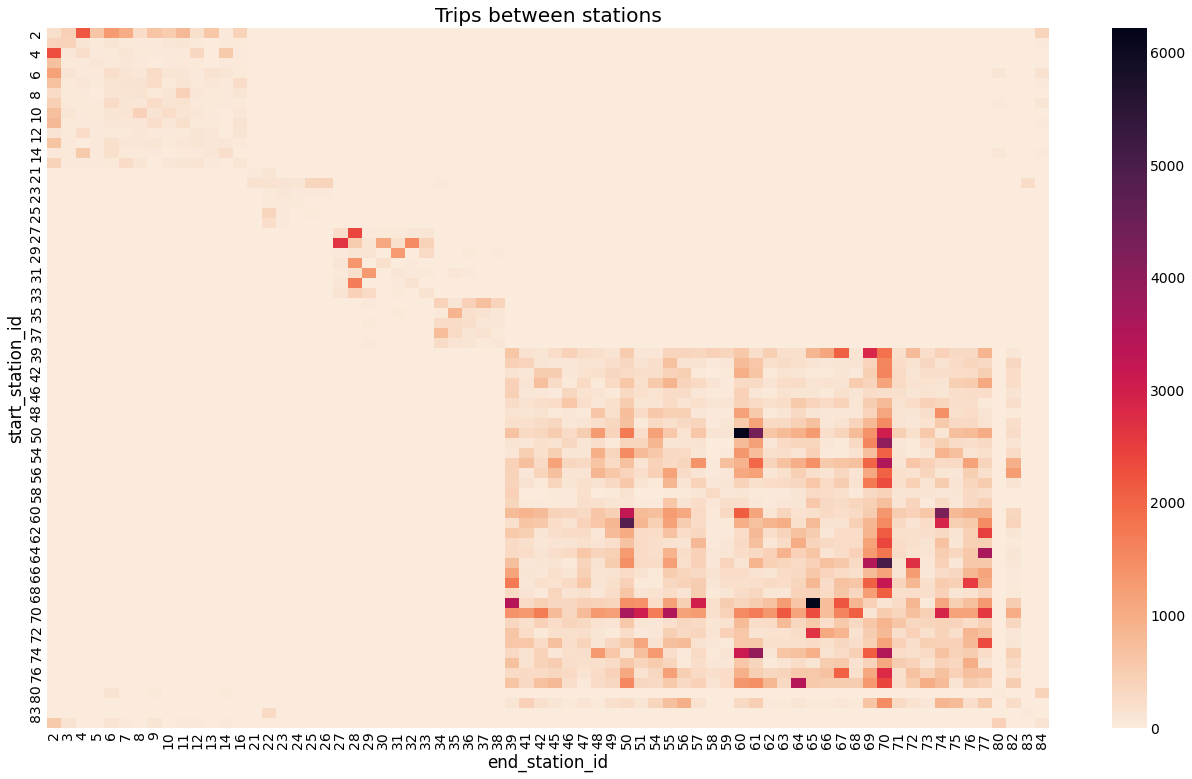

In [53]:
#group trips by start and end station and place 0 on non existant trips
grouped_by = trips.groupby(['start_station_id', 'end_station_id']).size().unstack(fill_value=0).stack()
#pass to dataframe
grouped_by_df = grouped_by.to_frame(name = 'count').reset_index()
#pivot according to the rows and columns of the df
heatmap_info = grouped_by_df.pivot(index='start_station_id', columns='end_station_id', values='count')
#
sb.heatmap(heatmap_info, cmap=sb.cm.rocket_r).set(title='Trips between stations')

<h1>Station Distribution</h1>

Number of stations: 70


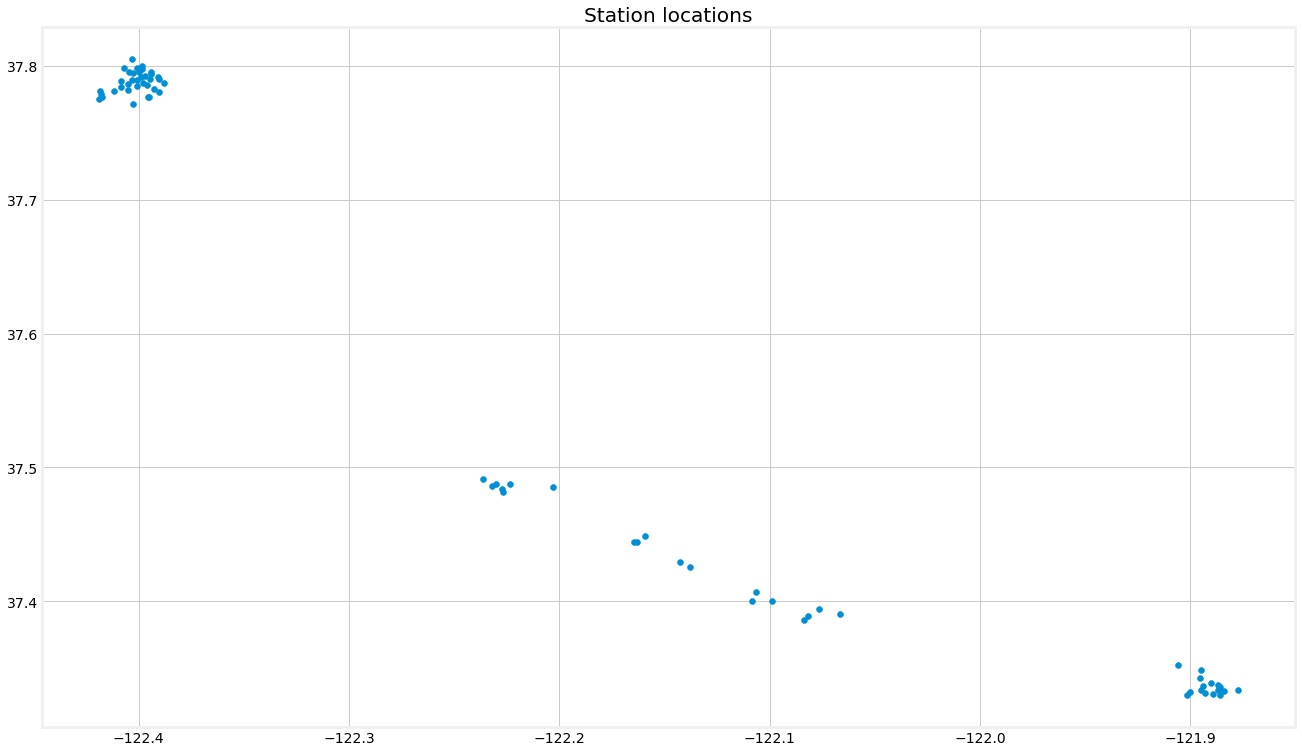

In [55]:
latitude = stations['lat'].tolist()
longitude = stations['long'].tolist()
print(f'Number of stations: {len(latitude)}')
plt.title("Station locations")
plt.scatter(longitude, latitude)

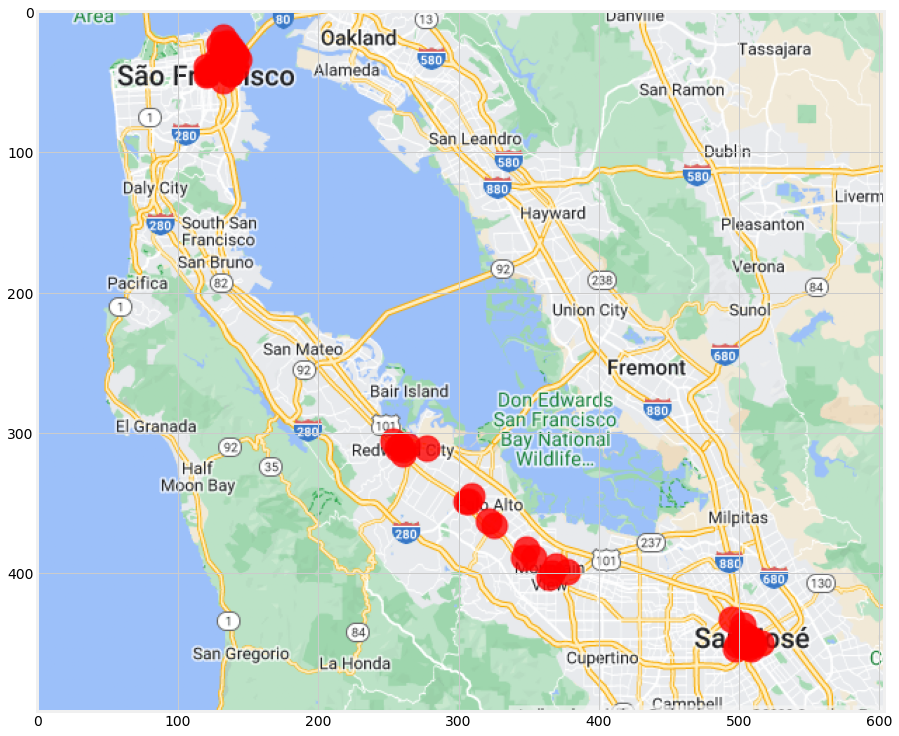

In [7]:
# for i in range(70):
#     print(f'{latitude[i]},{longitude[i]},red,circle')

img = mpimg.imread('sf_bayarea.png')
imgplot = plt.imshow(img)
plt.show()

Number of stations: 35
Station ID's:
[39, 41, 42, 45, 46, 47, 48, 49, 50, 51, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 82]


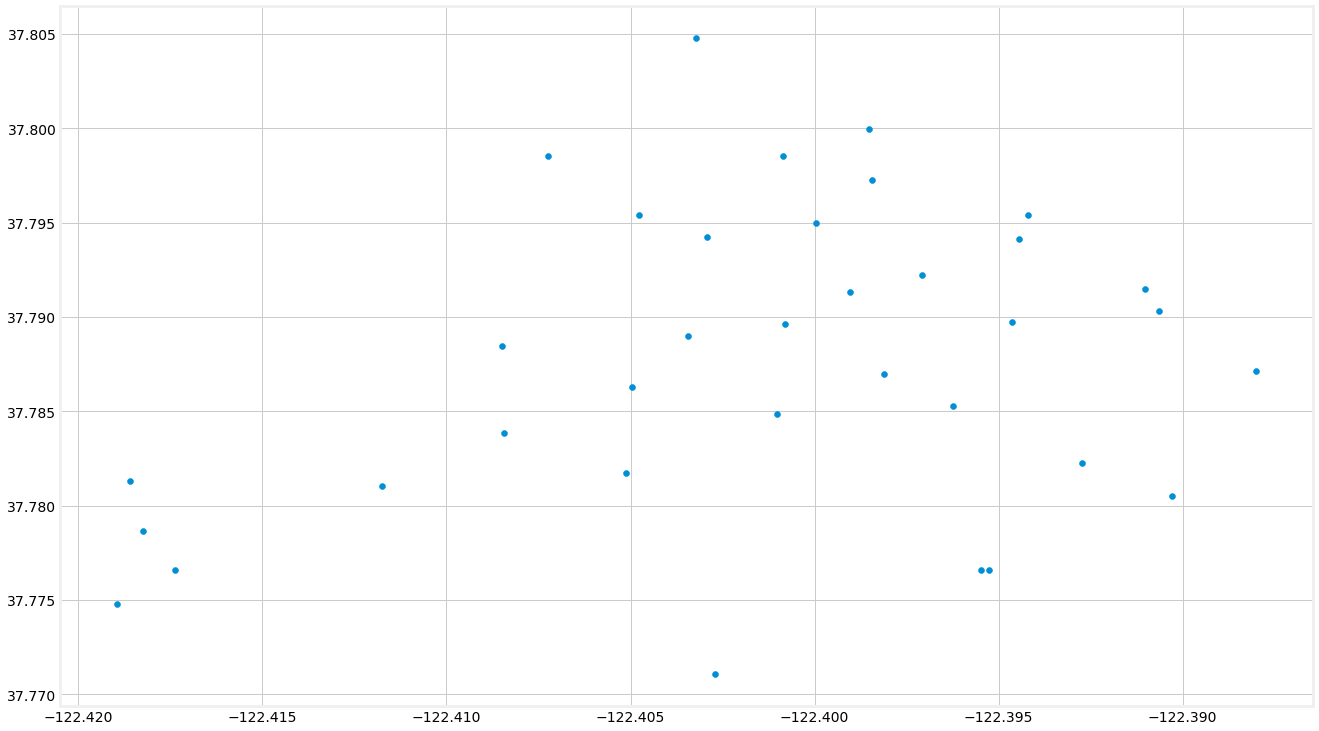

In [87]:
mask = stations['lat'] > 37.7
less_stations = stations[mask]['id'].tolist()
less_stations.sort()
latitude = stations[mask]['lat'].tolist()
longitude = stations[mask]['long'].tolist()
print(f'Number of stations: {len(latitude)}')
print("Station ID's:")
print(less_stations)
plt.scatter(longitude, latitude)

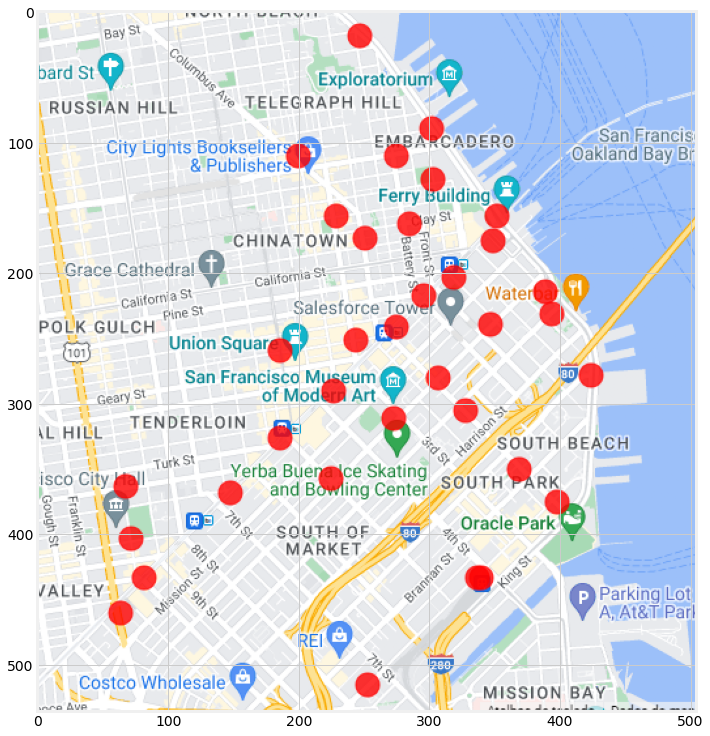

In [27]:
# for i in range(35):
#     print(f'{latitude[i]},{longitude[i]},red,circle')

img = mpimg.imread('sf_bayarea2.png')
imgplot = plt.imshow(img)
plt.show()

<h1>Trip analysis (updated)</h1>

[Text(0.5, 1.0, 'Trips between stations')]

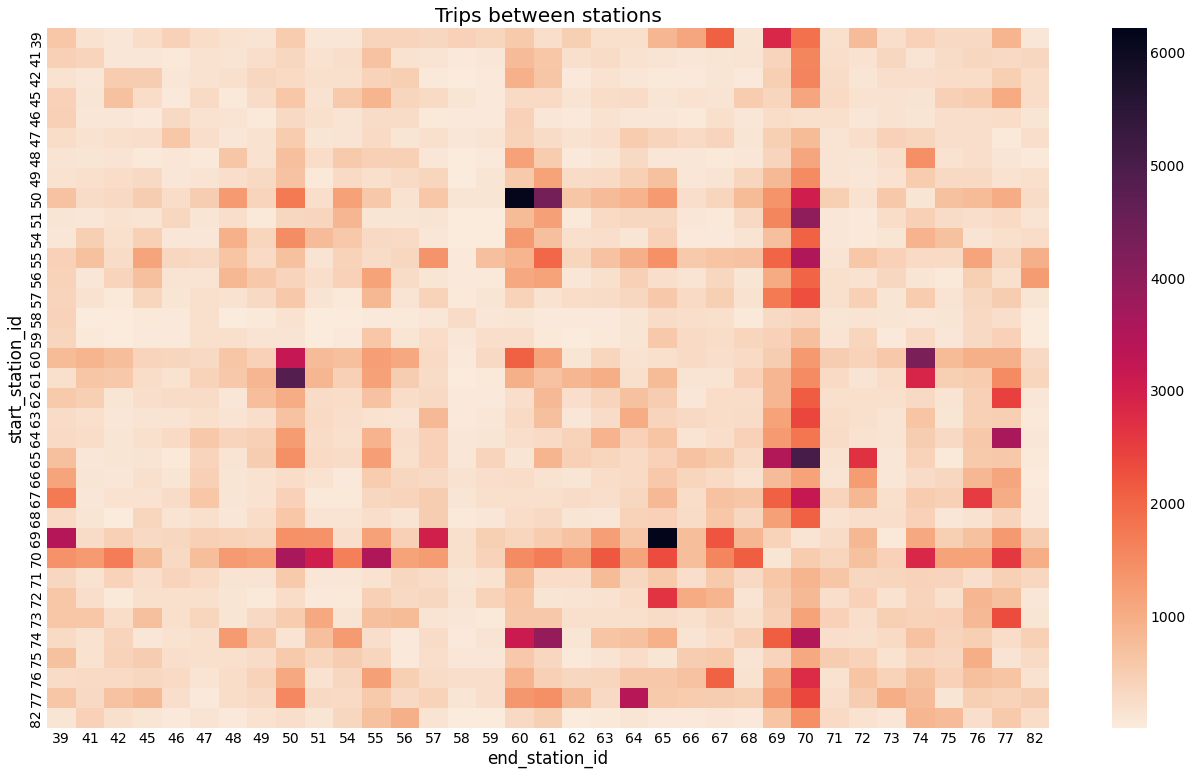

In [54]:
#group trips by start and end station and place 0 on non existant trips
mask = (trips['start_station_id'].isin(less_stations)) &  (trips['end_station_id'].isin(less_stations))
less_trips = trips[mask]
grouped_by = less_trips.groupby(['start_station_id', 'end_station_id']).size().unstack(fill_value=0).stack()
#pass to dataframe
grouped_by_df = grouped_by.to_frame(name = 'count').reset_index()
#pivot according to the rows and columns of the df
heatmap_info = grouped_by_df.pivot(index='start_station_id', columns='end_station_id', values='count')
#
sb.heatmap(heatmap_info, cmap=sb.cm.rocket_r).set(title='Trips between stations')

<h1>Trips per Station</h1>

In [81]:
mask = (trips['start_station_id'].isin(less_stations)) & (trips['end_station_id'].isin(less_stations))
less_trips = trips[mask]

trips_from_station = less_trips['start_station_id'].value_counts().sort_index()
trips_to_station = less_trips['end_station_id'].value_counts().sort_index()
difference = trips_from_station - trips_to_station
total_trips = trips_from_station + trips_to_station

<BarContainer object of 35 artists>

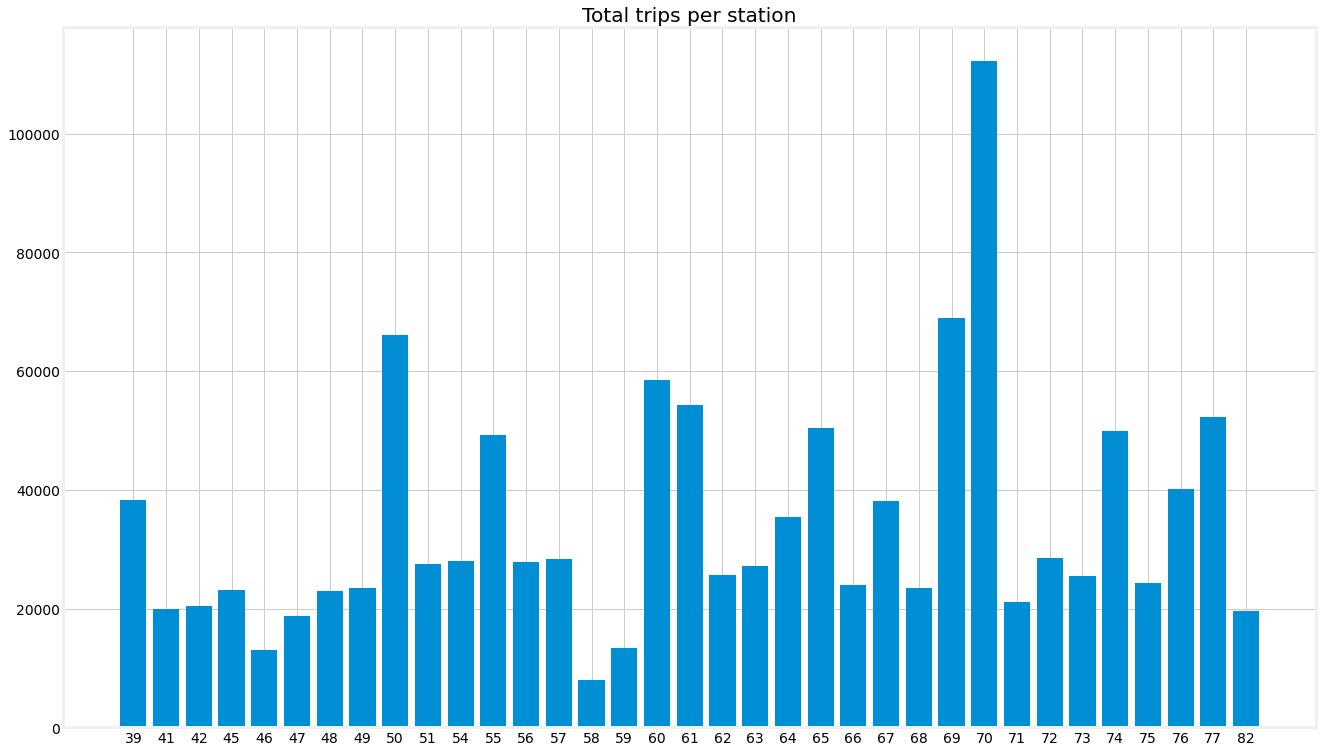

In [86]:
plt.title(f"Total trips per station")
x = np.arange(35)
plt.xticks(x, less_stations)
plt.bar(x, total_trips)

<BarContainer object of 35 artists>

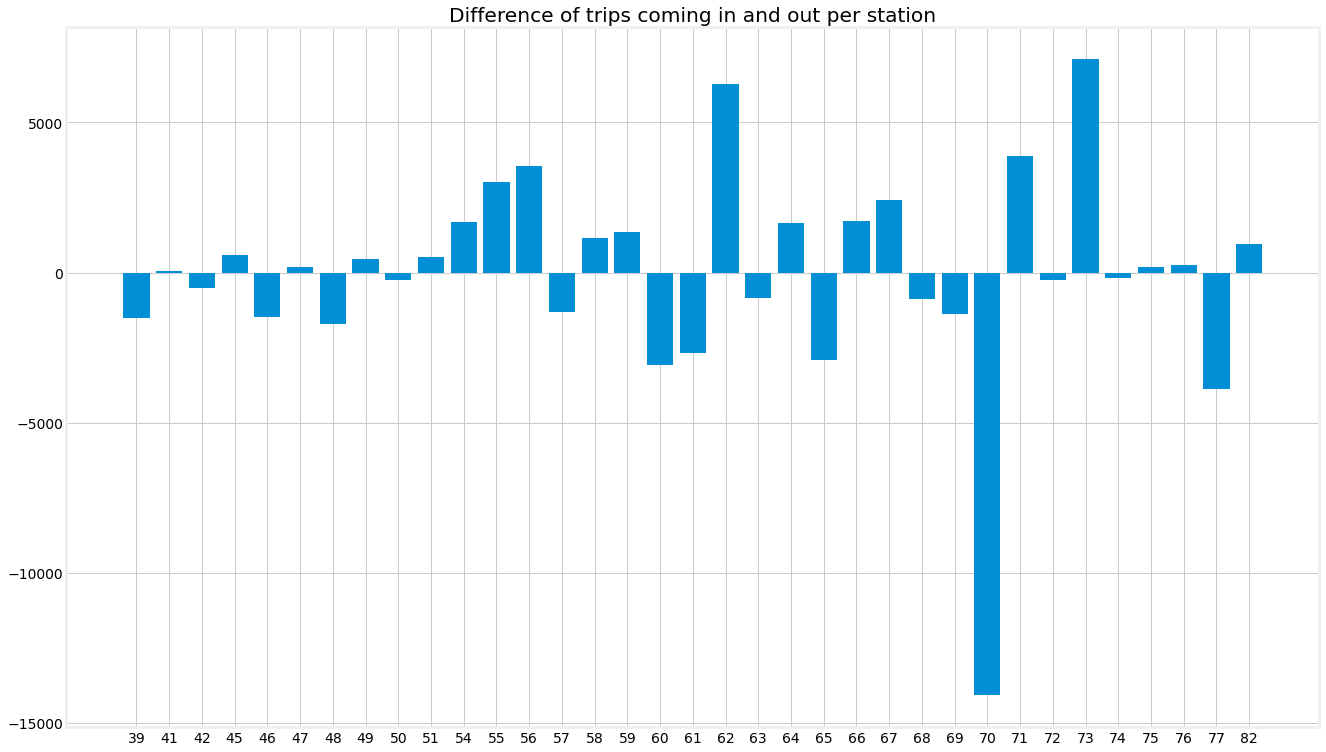

In [99]:
plt.title(f"Difference of trips coming in and out per station")
x = np.arange(35)
plt.xticks(x, less_stations)
plt.bar(x, difference)

<p>Positive value - more trips going out than going in - not enough bikes</p>
<p>Negative value - more trips going in than going out - too many bikes</p>

<h1>Status analysis</h1>

In [38]:
#chosing a single station to analyse
station_id = 2
single_station_status = status[status['station_id'] == station_id]
#convert time from string do datetime
single_station_status.loc[:, 'time'] = pd.to_datetime(single_station_status['time'], format='%Y/%m/%d %H:%M:%S')
single_station_status.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1046896 entries, 0 to 1046897
Data columns (total 4 columns):
 #   Column           Non-Null Count    Dtype         
---  ------           --------------    -----         
 0   station_id       1046896 non-null  int64         
 1   bikes_available  1046896 non-null  int64         
 2   docks_available  1046896 non-null  int64         
 3   time             1046896 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(3)
memory usage: 39.9 MB


C:\Users\Asus\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


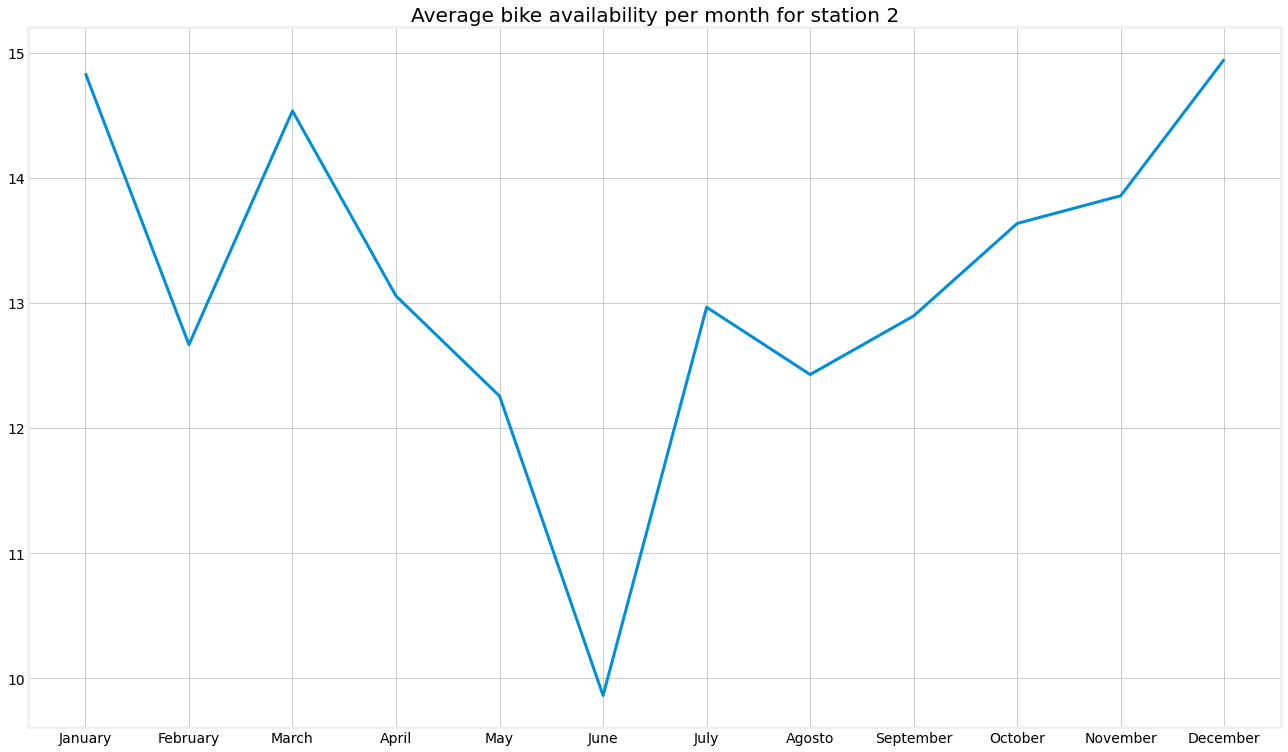

In [85]:
# Analysis per month
availability_p_month = np.array([single_station_status[single_station_status['time'].dt.month == i]['bikes_available'].mean()
                                for i in range(1,13)])
x = np.arange(0,12)
plt.xticks(x, ["January", "February", "March", "April", "May", "June", "July", "Agosto", "September", "October", "November", "December"])
plt.title(f"Average bike availability per month for station {station_id}")
plt.plot(x, availability_p_month)

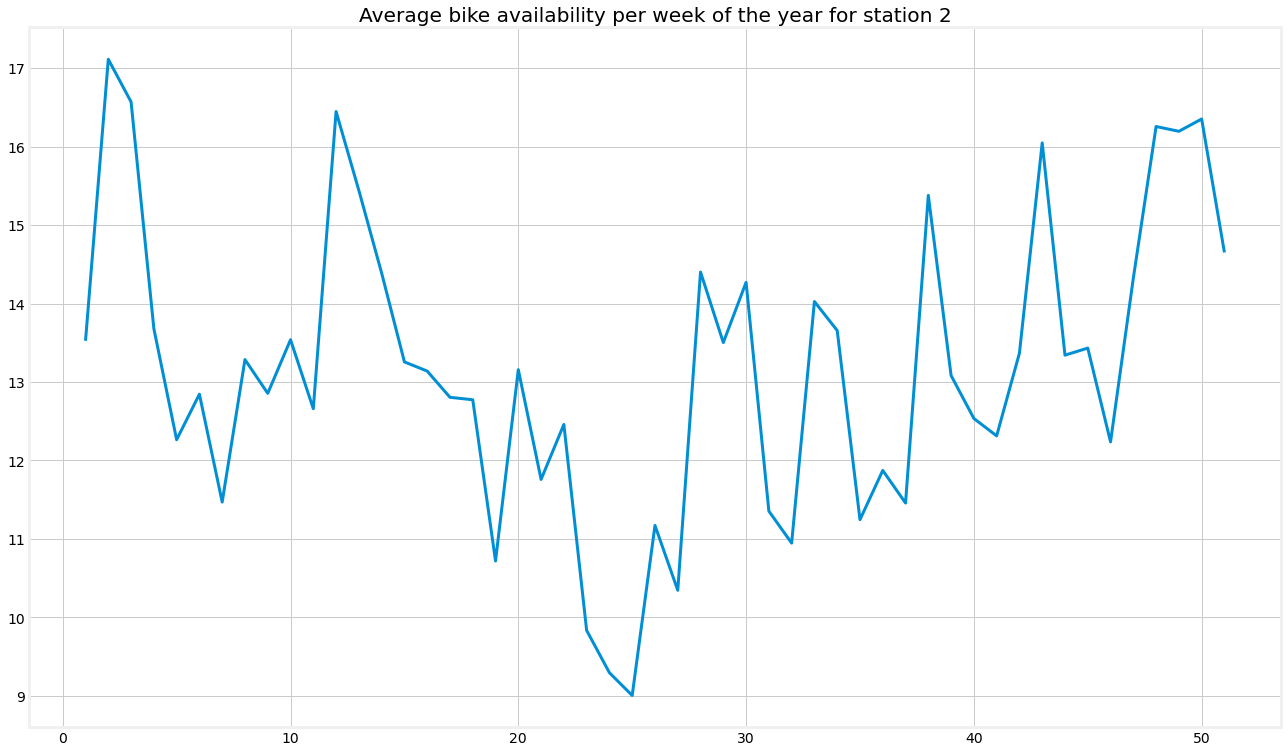

In [83]:
# Analysis per week
availability_p_week = np.array([single_station_status[single_station_status['time'].dt.isocalendar().week == i]['bikes_available'].mean()
                                for i in range(52)])
x = np.arange(0,52)
plt.title(f"Average bike availability per week of the year for station {station_id}")
plt.plot(x, availability_p_week)

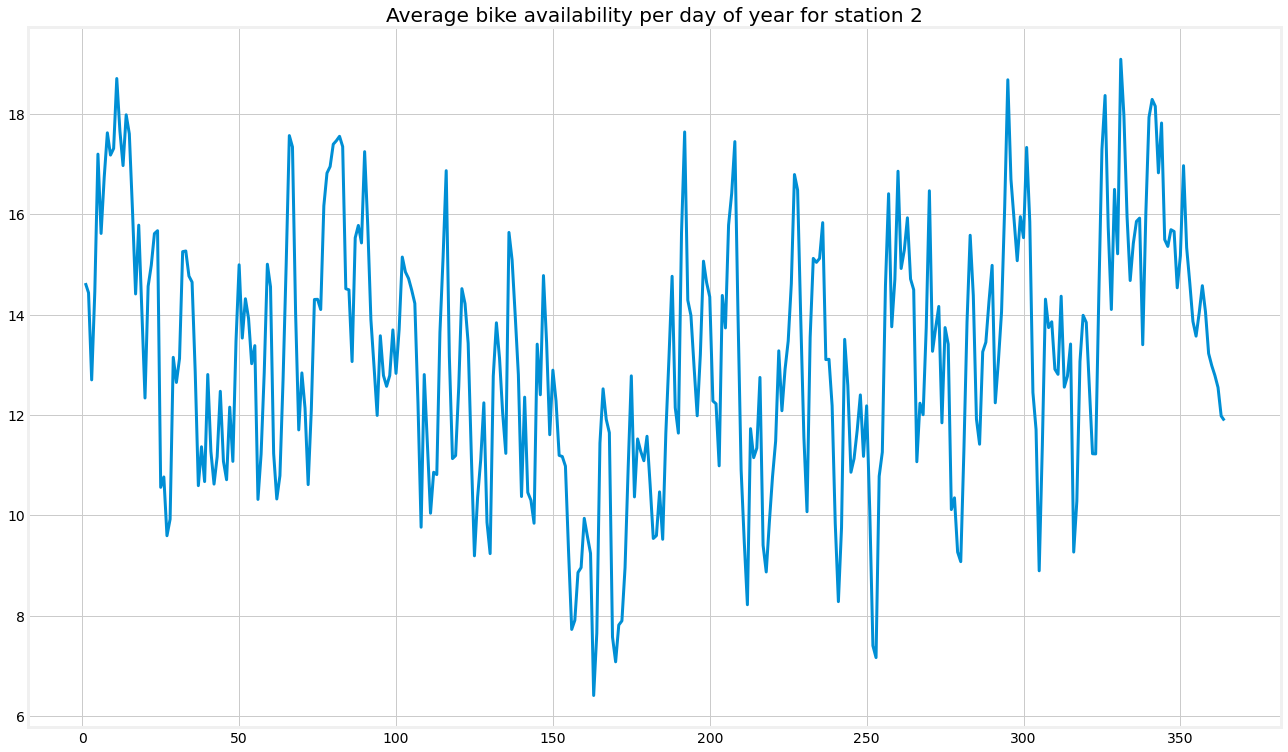

In [84]:
# Analysis per day of year
availability_p_day_of_year = np.array([single_station_status[single_station_status['time'].dt.dayofyear == i]['bikes_available'].mean()
                                for i in range(365)])
x = np.arange(0,365)
plt.title(f"Average bike availability per day of year for station {station_id}")
plt.plot(x, availability_p_day_of_year)

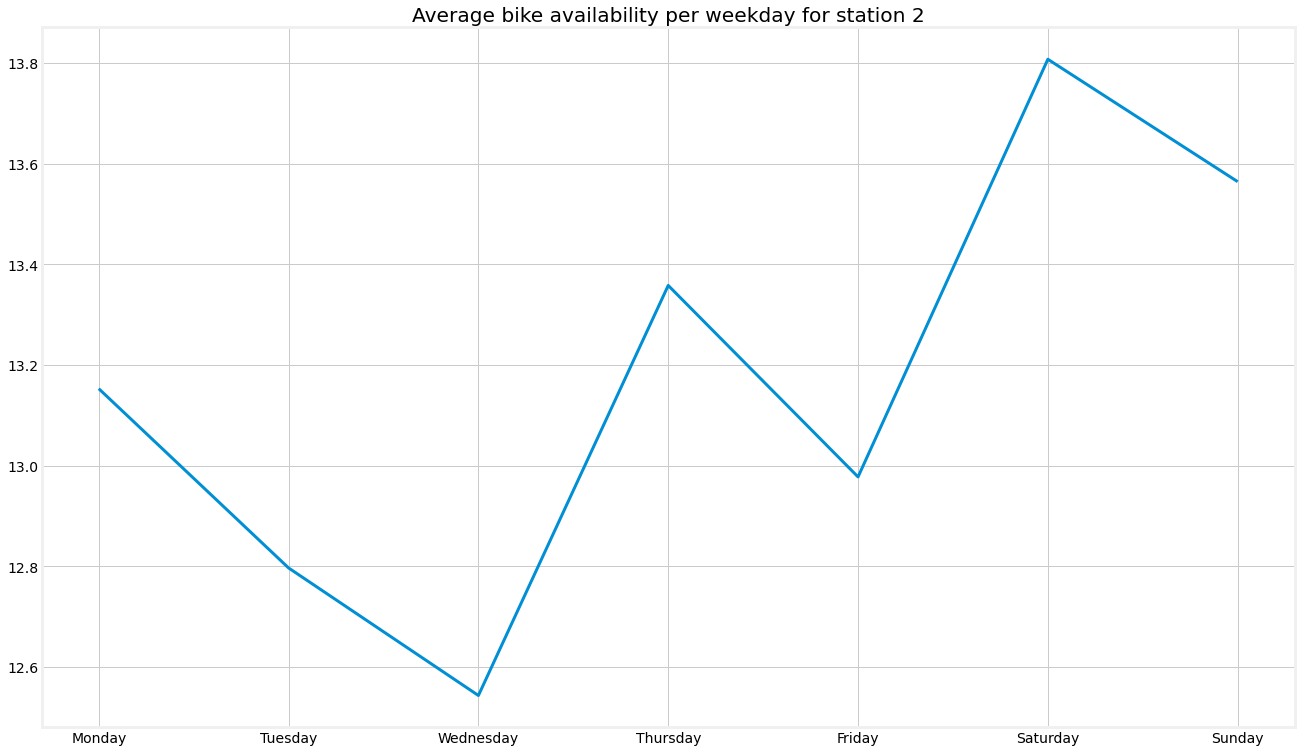

In [64]:
# Analysis per weekday
availability_p_weekday = np.array([single_station_status[single_station_status['time'].dt.weekday == i]['bikes_available'].mean()
                                for i in range(7)])
x = np.arange(0,7)
plt.xticks(x, ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
plt.title(f"Average bike availability per weekday for station {station_id}")
plt.plot(x, availability_p_weekday)

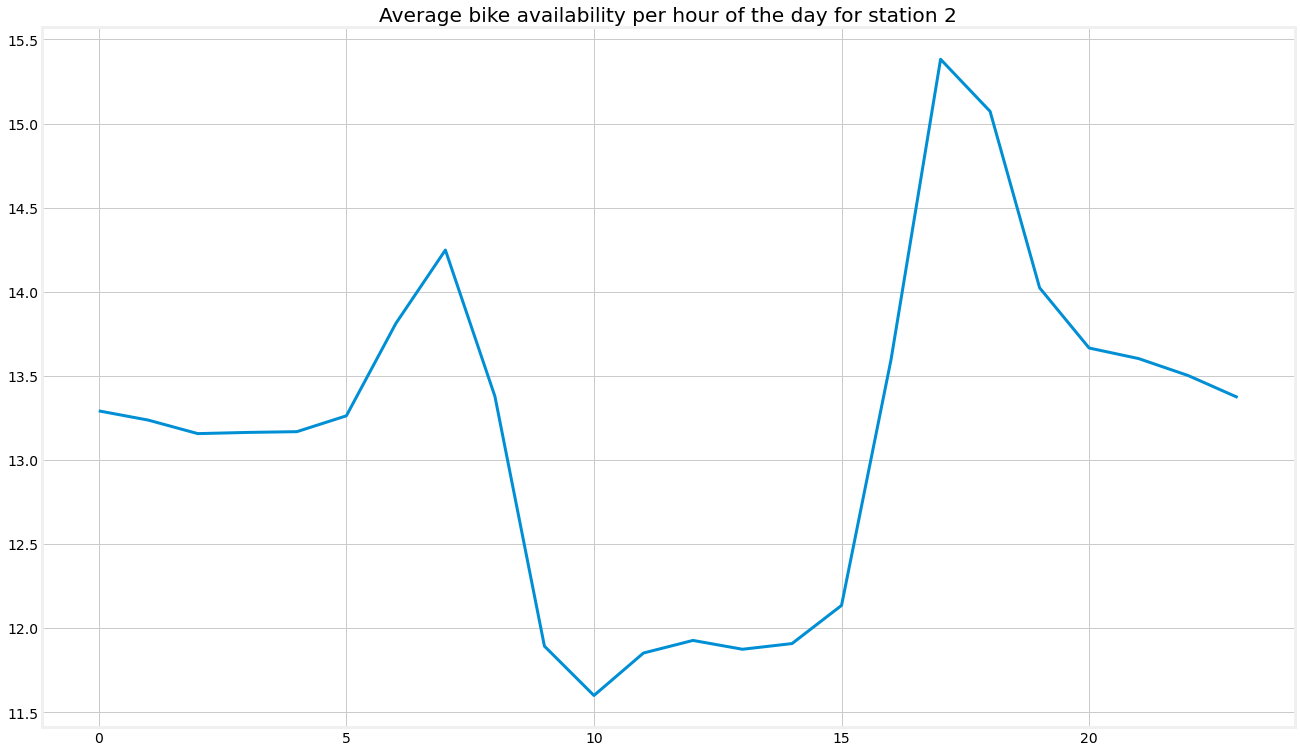

In [56]:
# Analysis per hour
availability_p_day = np.array([single_station_status[single_station_status['time'].dt.hour == i]['bikes_available'].mean()
                                for i in range(24)])
x = np.arange(0,24)
plt.title(f"Average bike availability per hour of the day for station {station_id}")
plt.plot(x, availability_p_day)